In [24]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import euclidean_distances
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
file_path = "formula1_2019season_tracks.csv"  # Adjust path if needed
df = pd.read_csv(file_path)

In [26]:
track_features = df[['Circuit Length', 'Turns', 'DRS Zones']].copy()

In [27]:
# Convert to numeric
track_features = track_features.apply(pd.to_numeric, errors='coerce')

In [28]:
# Standardize features
scaler = StandardScaler()
track_features_scaled = scaler.fit_transform(track_features)

In [29]:
# Compute Euclidean distance matrix
distance_matrix = euclidean_distances(track_features_scaled)

In [30]:
# Convert to DataFrame
distance_df = pd.DataFrame(distance_matrix, index=df['Circuit Name'], columns=df['Circuit Name'])

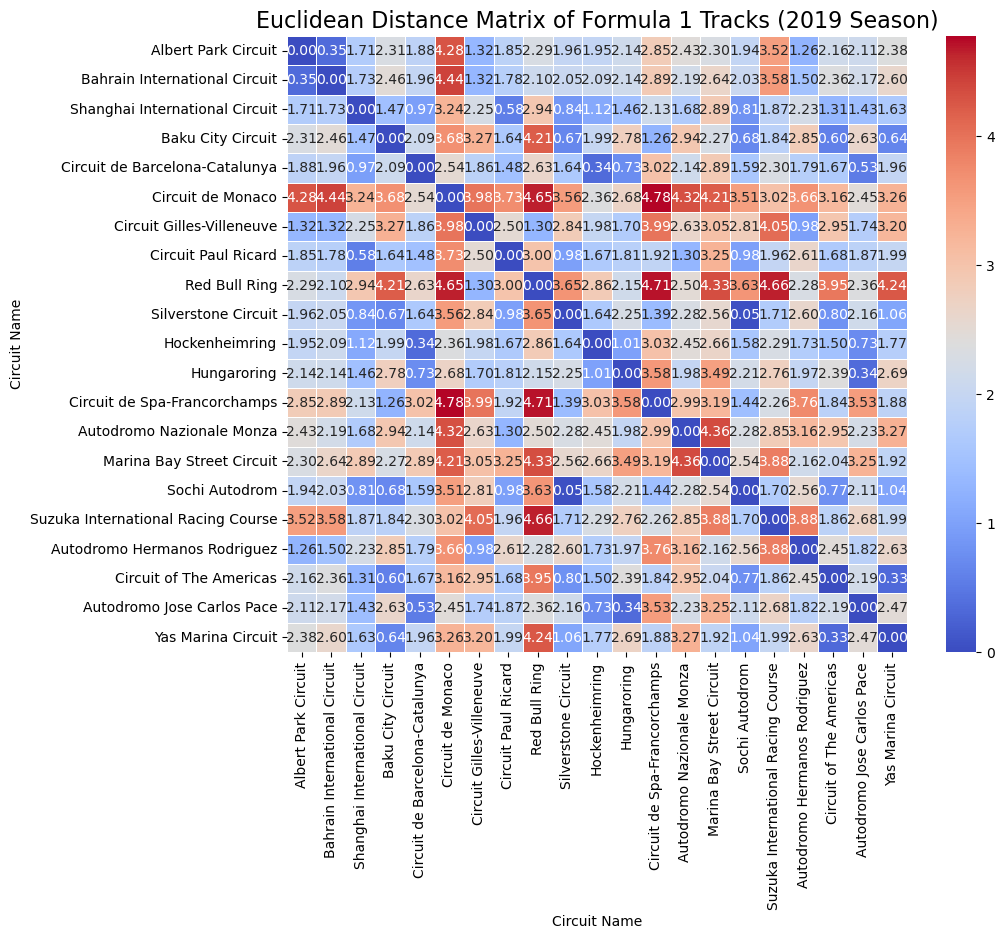

In [31]:
# Plot heatmap of the distance matrix
plt.figure(figsize=(10, 8))
sns.heatmap(distance_df, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Euclidean Distance Matrix of Formula 1 Tracks (2019 Season)', fontsize=16)
plt.show()

In [32]:
# Find the 10 most similar tracks for each track
similar_tracks = {
    track: distance_df[track].sort_values().index[1:11].tolist()
    for track in df['Circuit Name']
}

In [33]:
# Create a summary table of most similar tracks
similar_tracks_df = pd.DataFrame(similar_tracks).T
similar_tracks_df.columns = [f"Top {i+1}" for i in range(10)]

In [34]:
# Display the table
print("\nTop 10 Most Similar Tracks:")
print(similar_tracks_df)


Top 10 Most Similar Tracks:
                                                             Top 1  \
Albert Park Circuit                  Bahrain International Circuit   
Bahrain International Circuit                  Albert Park Circuit   
Shanghai International Circuit                 Circuit Paul Ricard   
Baku City Circuit                          Circuit of The Americas   
Circuit de Barcelona-Catalunya                      Hockenheimring   
Circuit de Monaco                                   Hockenheimring   
Circuit Gilles-Villeneuve             Autodromo Hermanos Rodriguez   
Circuit Paul Ricard                 Shanghai International Circuit   
Red Bull Ring                            Circuit Gilles-Villeneuve   
Silverstone Circuit                                 Sochi Autodrom   
Hockenheimring                      Circuit de Barcelona-Catalunya   
Hungaroring                             Autodromo Jose Carlos Pace   
Circuit de Spa-Francorchamps                     Baku City Ci

In [35]:
# Display results
for track, similar in similar_tracks.items():
    print(f"Top 10 similar tracks to {track}: {similar}")

Top 10 similar tracks to Albert Park Circuit: ['Bahrain International Circuit', 'Autodromo Hermanos Rodriguez', 'Circuit Gilles-Villeneuve', 'Shanghai International Circuit', 'Circuit Paul Ricard', 'Circuit de Barcelona-Catalunya', 'Sochi Autodrom', 'Hockenheimring', 'Silverstone Circuit', 'Autodromo Jose Carlos Pace']
Top 10 similar tracks to Bahrain International Circuit: ['Albert Park Circuit', 'Circuit Gilles-Villeneuve', 'Autodromo Hermanos Rodriguez', 'Shanghai International Circuit', 'Circuit Paul Ricard', 'Circuit de Barcelona-Catalunya', 'Sochi Autodrom', 'Silverstone Circuit', 'Hockenheimring', 'Red Bull Ring']
Top 10 similar tracks to Shanghai International Circuit: ['Circuit Paul Ricard', 'Sochi Autodrom', 'Silverstone Circuit', 'Circuit de Barcelona-Catalunya', 'Hockenheimring', 'Circuit of The Americas', 'Autodromo Jose Carlos Pace', 'Hungaroring', 'Baku City Circuit', 'Yas Marina Circuit']
Top 10 similar tracks to Baku City Circuit: ['Circuit of The Americas', 'Yas Marin

/var/folders/d3/7s1_11hs4j3f5rqlg3rsd10w0000gn/T/ipykernel_15241/1999623347.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_similar, y=distance_df[track_example].loc[top_similar], palette='viridis')


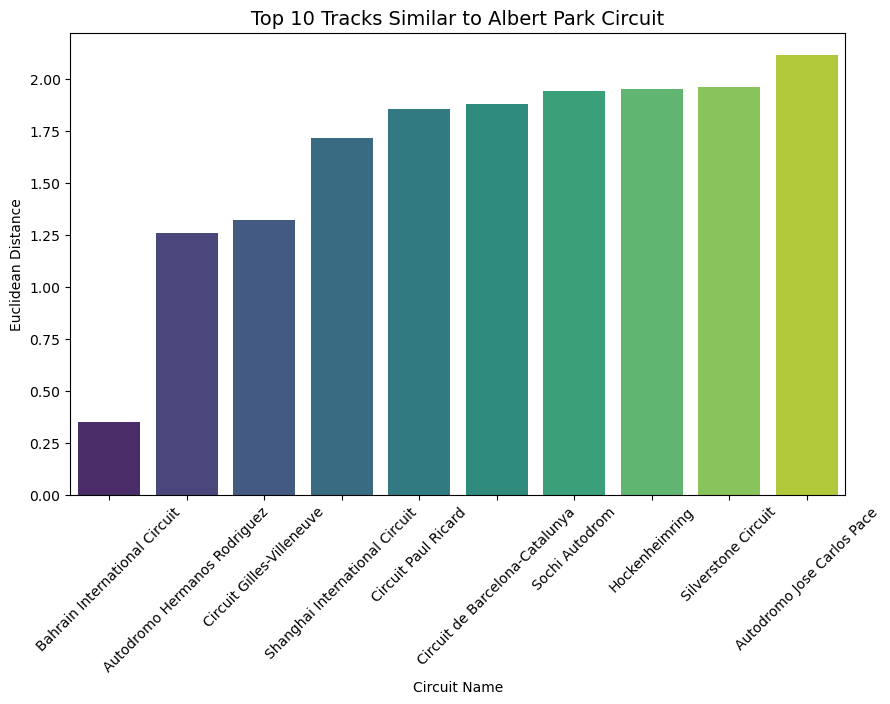

In [36]:
track_example = 'Albert Park Circuit' 
top_similar = distance_df[track_example].sort_values().index[1:11]

plt.figure(figsize=(10, 6))
sns.barplot(x=top_similar, y=distance_df[track_example].loc[top_similar], palette='viridis')
plt.title(f"Top 10 Tracks Similar to {track_example}", fontsize=14)
plt.ylabel('Euclidean Distance')
plt.xticks(rotation=45)
plt.show()